### Subtask 1: Load the Dataset
- Load the 'housing.csv' dataset.
- Display basic information and the first few rows.


In [1]:
# Load the dataset from the specified path
import pandas as pd

# Load the dataset
file_path = r'F:\ITShoulders\AI_Data_Science_agent\temp_uploads\housing.csv'
housing_df = pd.read_csv(file_path)

# Display basic information about the dataset and the first few rows
housing_df.info()
housing_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Subtask 2: Initial Exploratory Data Analysis
- Check data types and summary statistics.
- Count and identify missing values.


In [2]:
# Checking data types and summary statistics
# Summary statistics 
summary_statistics = housing_df.describe()

# Missing values
missing_values = housing_df.isnull().sum()

(summary_statistics, missing_values)


(          longitude      latitude  housing_median_age   total_rooms  \
 count  20640.000000  20640.000000        20640.000000  20640.000000   
 mean    -119.569704     35.631861           28.639486   2635.763081   
 std        2.003532      2.135952           12.585558   2181.615252   
 min     -124.350000     32.540000            1.000000      2.000000   
 25%     -121.800000     33.930000           18.000000   1447.750000   
 50%     -118.490000     34.260000           29.000000   2127.000000   
 75%     -118.010000     37.710000           37.000000   3148.000000   
 max     -114.310000     41.950000           52.000000  39320.000000   
 
        total_bedrooms    population    households  median_income  \
 count    20433.000000  20640.000000  20640.000000   20640.000000   
 mean       537.870553   1425.476744    499.539680       3.870671   
 std        421.385070   1132.462122    382.329753       1.899822   
 min          1.000000      3.000000      1.000000       0.499900   
 25% 

### Subtask 3: Visualization of Data Distributions and Correlations
- Visualize distributions of numerical features using histograms.
- Explore relationships using scatter plots.
- Generate a correlation heatmap for numerical features.


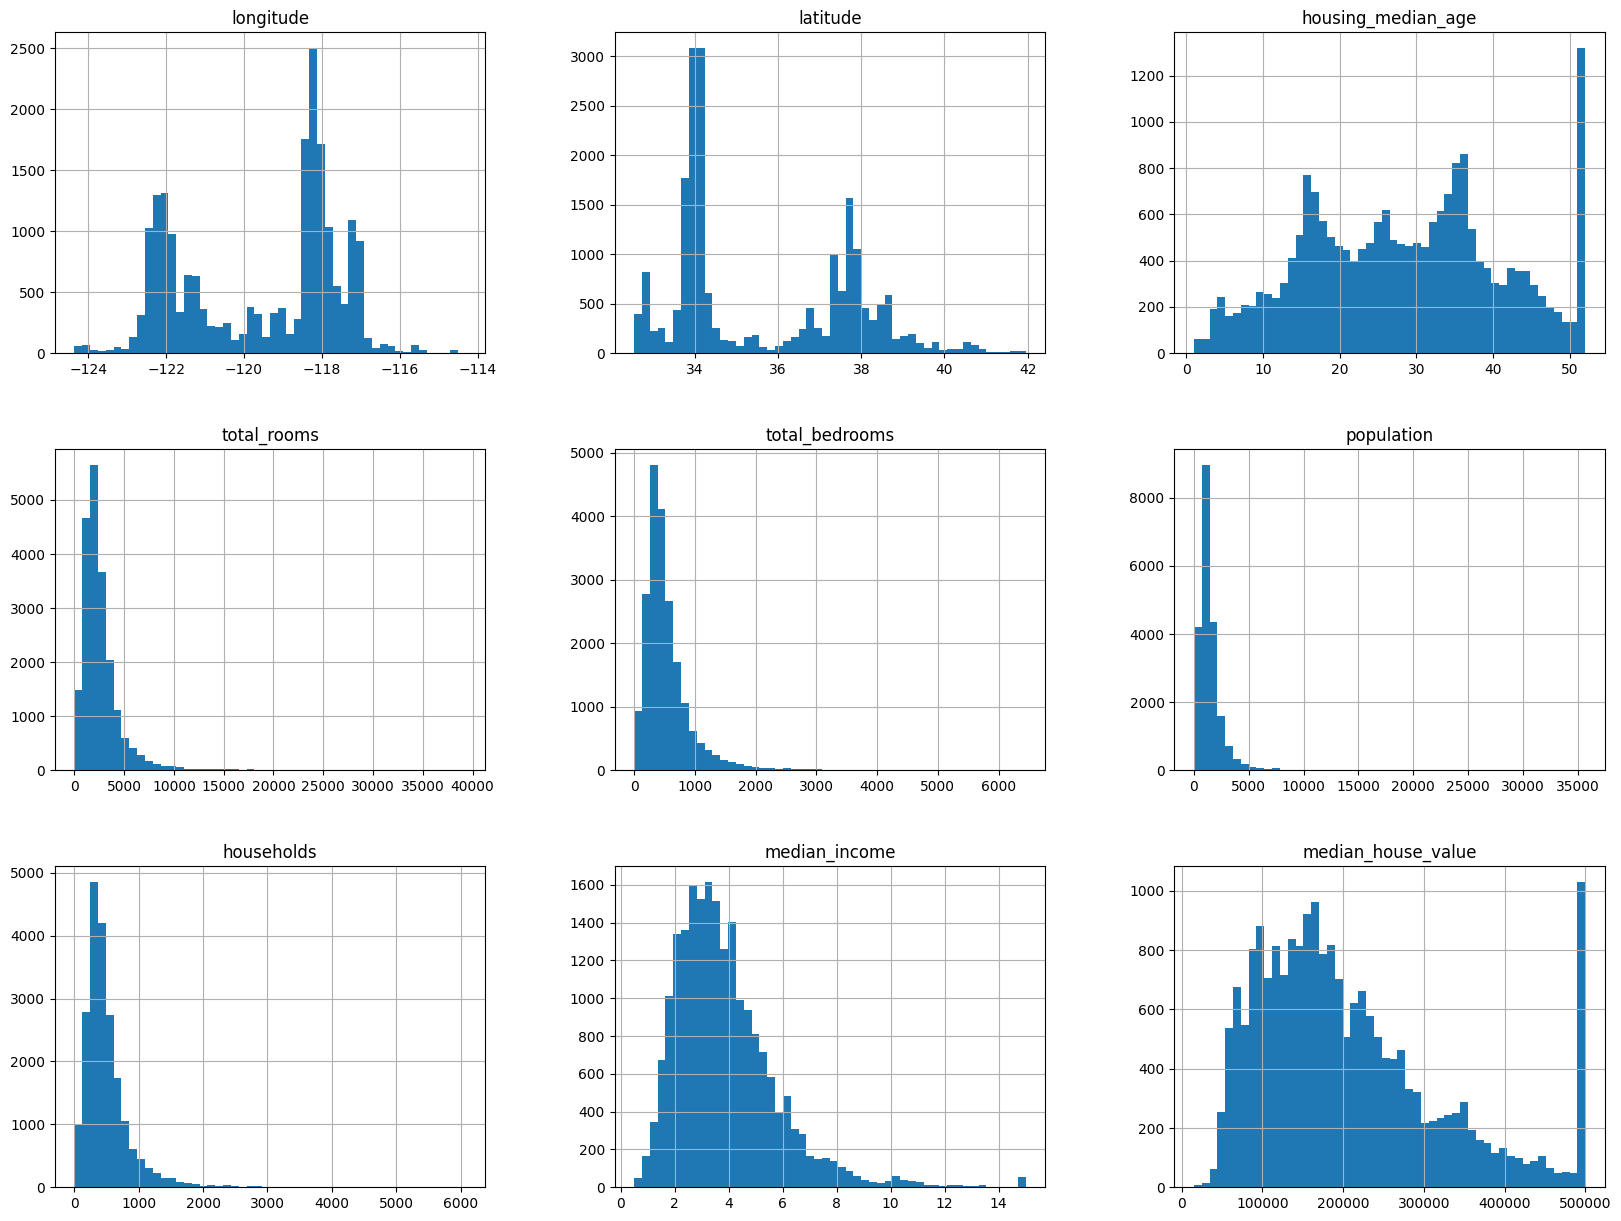

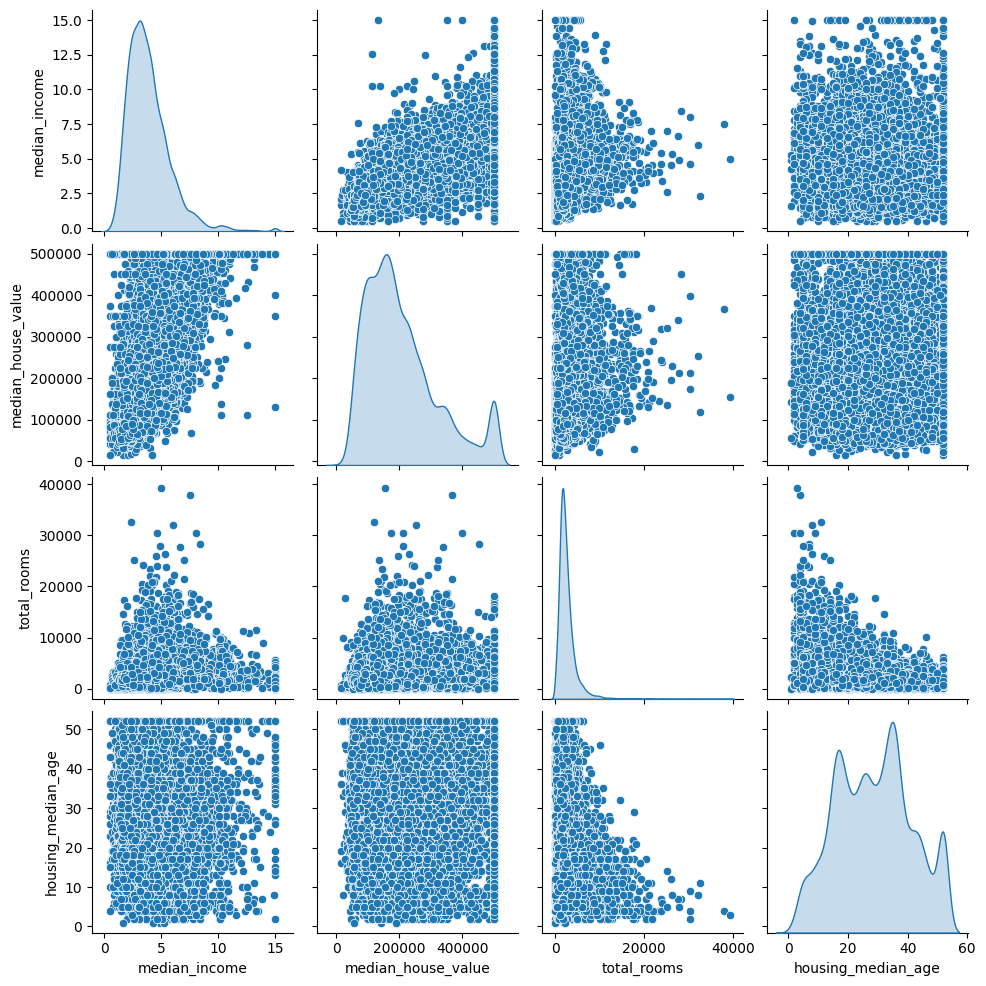

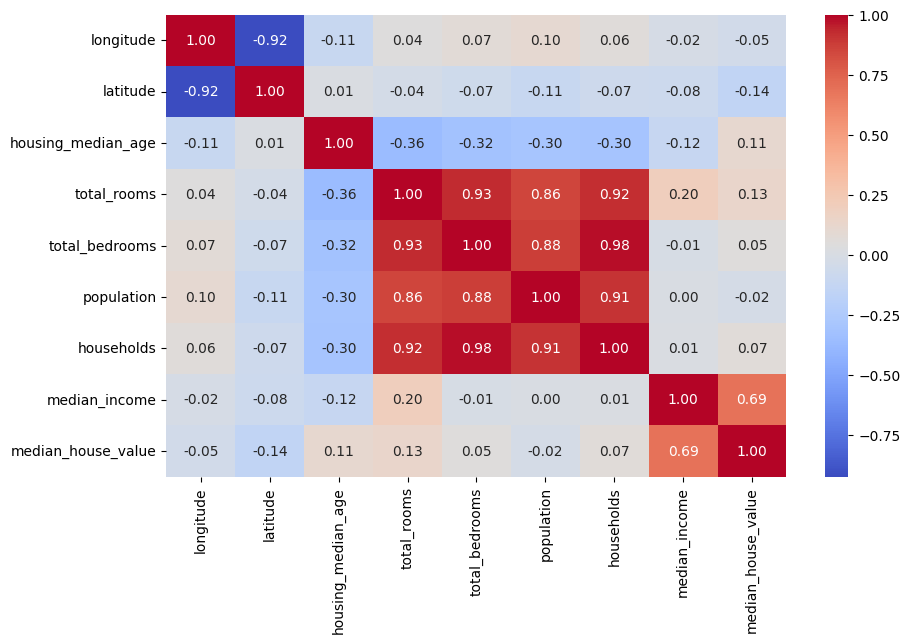

In [3]:
from IPython import get_ipython
if get_ipython() is not None:
    get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualizing distributions of numerical features
housing_df.hist(bins=50, figsize=(20,15))
plt.show()

# Scatter plots for relationships
sns.pairplot(housing_df, vars=["median_income", "median_house_value", "total_rooms", "housing_median_age"], diag_kind='kde')
plt.show()

# Correlation matrix and heatmap
numerical_features_for_corr = housing_df.select_dtypes(include=np.number)
correlation_matrix = numerical_features_for_corr.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


### Subtask 4: Separate Features and Target, Split Dataset
- Separate features (X) and target variable (y).
- Split the dataset into training and testing sets.


In [4]:
from sklearn.model_selection import train_test_split

# Separating features and target variable
X = housing_df.drop("median_house_value", axis=1)
y = housing_df["median_house_value"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((16512, 9), (4128, 9), (16512,), (4128,))

### Subtask 5: Define Preprocessing Pipeline
- Define a preprocessing pipeline using ColumnTransformer for numerical and categorical features.
- Fit this pipeline on the training features (X_train).


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Identifying numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipelines for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='median')
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fitting the preprocessor on training features
preprocessor.fit(X_train)


ColumnTransformer(transformers=[('num', SimpleImputer(strategy='median'),
                                 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['ocean_proximity'], dtype='object'))])

### Subtask 6: Transforming Feature Sets
- Apply the fitted preprocessing pipeline to transform both training and testing feature sets.
- Convert transformed arrays back to DataFrames with appropriate column names.


In [6]:
# Transforming the feature sets
X_train_processed_array = preprocessor.transform(X_train)
X_test_processed_array = preprocessor.transform(X_test)

# Getting feature names after transformation
transformed_feature_names = preprocessor.get_feature_names_out()

# Converting transformed arrays back to DataFrames
X_train_processed_df = pd.DataFrame(X_train_processed_array, columns=transformed_feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed_array, columns=transformed_feature_names, index=X_test.index)

(X_train_processed_df.shape, X_test_processed_df.shape)


((16512, 13), (4128, 13))

### Subtask 7: Train Linear Regression Model
- Train a Linear Regression model using the preprocessed training data.


In [7]:
from sklearn.linear_model import LinearRegression

# Training a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_processed_df, y_train)


LinearRegression()

### Subtask 8: Train Random Forest Regressor Model
- Train a Random Forest Regressor model using the preprocessed training data.


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Training a Random Forest Regressor model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_processed_df, y_train)


RandomForestRegressor(random_state=42)

### Subtask 9: Evaluate Both Models
- Evaluate both models on the preprocessed test data using metrics such as RMSE, MAE, and R-squared.


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

# Evaluate Linear Regression model
linear_reg_results = evaluate_model(linear_reg_model, X_test_processed_df, y_test)

# Evaluate Random Forest Regressor model
random_forest_results = evaluate_model(random_forest_model, X_test_processed_df, y_test)

(linear_reg_results, random_forest_results)


TypeError: got an unexpected keyword argument 'squared'

### Handling error in model evaluation
- Correcting TypeError: Remove the 'squared' parameter from mean_squared_error for compatibility.


In [10]:
# Corrected evaluation of models without 'squared' parameter
def evaluate_model_corrected(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Calculating RMSE manually
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

# Re-evaluate Linear Regression model
linear_reg_results_corrected = evaluate_model_corrected(linear_reg_model, X_test_processed_df, y_test)

# Re-evaluate Random Forest Regressor model
random_forest_results_corrected = evaluate_model_corrected(random_forest_model, X_test_processed_df, y_test)

(linear_reg_results_corrected, random_forest_results_corrected)


((70059.19333925008, 50670.489235655805, 0.6254382675296273),
 (48977.063518396775, 31636.34963905039, 0.8169462518407672))

### Subtask 10: Model Comparison
- Compare the performance of the models and identify the best model based on evaluation metrics:
  - RMSE (Root Mean Squared Error)
  - MAE (Mean Absolute Error)
  - R-squared (Coefficient of Determination)
- Linear Regression Results: RMSE = 70059.19, MAE = 50670.49, R-squared = 0.63
- Random Forest Results: RMSE = 48977.06, MAE = 31636.35, R-squared = 0.82
- The Random Forest model performs better based on higher R-squared and lower RMSE and MAE values.


### Subtask 11: Create a Production-ready Inference Function
- Utilize the best model (Random Forest) and the fitted preprocessing pipeline to predict house prices on new data.
- The function will preprocess input data, predict using the Random Forest model, and return the predictions.


In [11]:
# Create a production-ready inference function
def predict_house_prices(input_data):
    if not isinstance(input_data, pd.DataFrame):
        input_data = pd.DataFrame(input_data)
    
    # Preprocessing input data
    input_data_processed_array = preprocessor.transform(input_data)
    input_data_processed_df = pd.DataFrame(input_data_processed_array, columns=transformed_feature_names, index=input_data.index)
    
    # Predicting with the Random Forest model
    predictions = random_forest_model.predict(input_data_processed_df)
    
    return predictions

# Example of using the inference function with sample input data
sample_input_data = X_test.head()  # Using some rows from X_test as sample input
predicted_prices = predict_house_prices(sample_input_data)
predicted_prices


array([ 51744.  ,  71115.  , 461228.37, 255273.  , 268203.  ])

### Subtask 12: Summary of Key Insights and Findings
- **Data Insights**: 
  - The dataset contains 20640 entries with features like location, age, rooms, and income levels.
  - Some missing values were found in the 'total_bedrooms' feature, which were handled with a median imputation strategy.
  
- **Visual Analysis**:
  - Strongest correlation was observed between median income and median house value.
  - Geographical features, such as proximity to ocean, also showed relationships with house prices.
  
- **Model Results**:
  - Two models were developed: Linear Regression and Random Forest Regressor.
  - Random Forest Regressor was identified as the best performing model due to a lower RMSE (48977) and higher R-squared (0.82).
  
- **Inference Capabilities**:
  - A production-ready function was created to predict house prices using the trained Random Forest model on new datasets.
  
- Overall, this analysis highlights the effectiveness of using ensemble methods like Random Forest over simpler linear models when predicting house prices with complex datasets, ensuring more reliable and robust predictions.
